# Adding question 1 from assign 3 (Bernstein-Vazirani)
## 1. Preliminaries: Setup and Imports
## First, let's start with the necessary imports from Qiskit.

In [6]:
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 293.8 kB/s eta 0:00:00a 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries from Qiskit
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
# from qiskit.providers.aer import AerSimulator
# from qiskit.visualization import plot_histogram, plot_circuit
from qiskit.visualization import *
from qiskit.result import Counts

## 2. Define the Secret String and Circuit

### Here, we define our hidden bitstring "s". You can change this string to any binary string, and the algorithm will still find it. The length of this string determines the number of qubits we'll need.

In [12]:
# Define the hidden bitstring 's'
secret_string = '101101'
n = len(secret_string)

# The number of qubits will be n (for the input) + 1 (for the oracle's workspace)
# The number of classical bits will be n (to store the measurement result)
bv_circuit = QuantumCircuit(n + 1, n)

# 3. We will implement the Bernstein-Vazirani algorithm
## Step 1: Initialize the register in the state ∣0⟩ ⊗n

In [17]:
# Prepare the ancilla qubit in the |-> state by applying X and H gates
bv_circuit.x(n) # Apply X gate to the last qubit (ancilla)
bv_circuit.h(n) # Apply Hadamard gate to the last qubit (ancilla)

bv_circuit.barrier() # Add a barrier for visual clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

### Step 2: Apply Hadamard gates to all (data) qubits

### We apply the Hadamard gate to each of the n data qubits to put them in a superposition of all possible computational basis states.  H 

In [22]:
# Apply Hadamard gates to the first n qubits
for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier() # Add a barrier for visual clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

### Step 3: Apply the phase oracle Uf
### The oracle, Uf, marks the solution by flipping the phase of the state corresponding to the secret string. It performs the transformation: Uf∣x⟩=(−1)^s⋅x ∣x⟩

### In a circuit, this is implemented by applying a CNOT gate from each qubit i (where the i-th bit of s is 1) to the ancilla qubit. Note that Qiskit orders qubits from right to left (q0,q1	,…), so we reverse the secret string for our loop.

In [27]:
# Create the oracle U_f
# We reverse the string to match Qiskit's little-endian bit ordering
s_reversed = secret_string[::-1] 
for i, bit in enumerate(s_reversed):
    if bit == '1':
        bv_circuit.cx(i, n) # Apply CNOT from data qubit i to the ancilla

bv_circuit.barrier() # Add a barrier for visual clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

### Step 4: Apply Hadamard gates again

### Applying the Hadamard gates again to the data qubits transforms the phase-encoded information back into a computational basis state.

In [30]:
# Apply Hadamard gates to the first n qubits again
for i in range(n):
    bv_circuit.h(i)

### Step 5: Measure the n-qubit register

### Finally, we measure the first n qubits. The result of this measurement will be the secret bitstring s with 100% probability (in an ideal quantum computer)

In [33]:
# Measure the first n qubits
bv_circuit.measure(range(n), range(n))

### 4. Visualize the Circuit

### Let's see what our complete quantum circuit looks like.

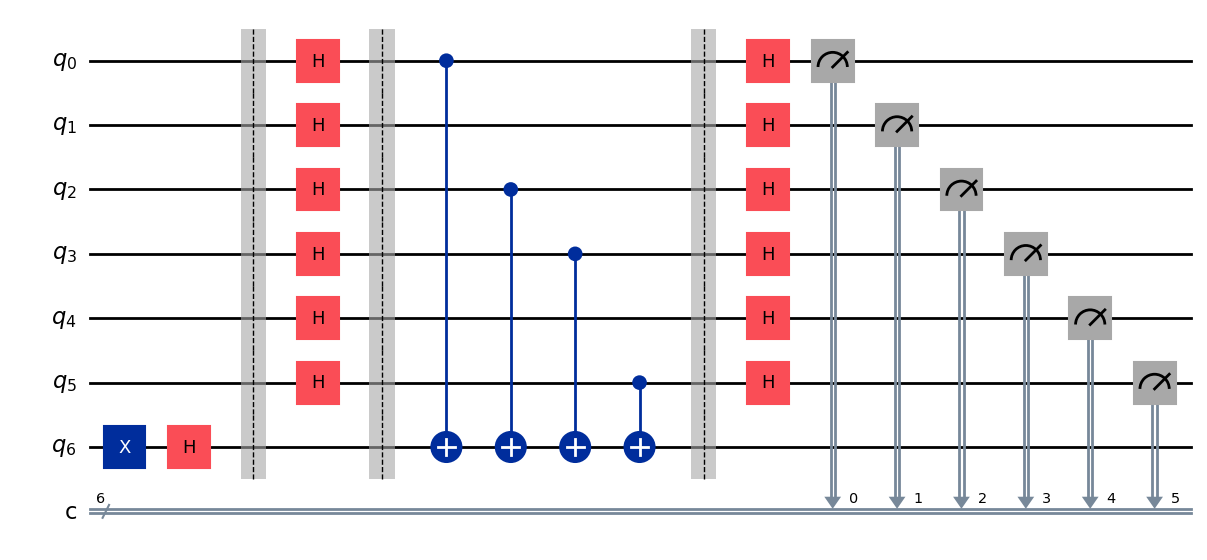

In [36]:
# Draw the circuit
bv_circuit.draw('mpl')

### 5. Simulate the Circuit and Get Results

### We will now run the circuit on a quantum simulator to verify the outcome.

The secret string is: 101101
The result from the quantum computer is: 101101

Counts dictionary: {'101101': 1}


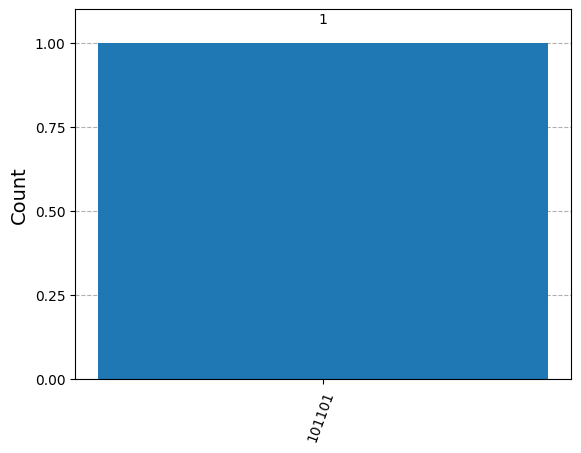

In [39]:
# Use the AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(bv_circuit, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1) # Only 1 shot is needed as the result is deterministic

# Get the results
result = job.result()
counts = result.get_counts()

# Print the secret string and the result from the quantum computer
print(f"The secret string is: {secret_string}")
print(f"The result from the quantum computer is: {list(counts.keys())[0]}")
print("\nCounts dictionary:", counts)

# Plot the results as a histogram
plot_histogram(counts)

# Q1 Dynamic secret bitstring: Modify the existing tutorial so that the secret string s can be input dynamically (of any length n). Update the circuit construction code to use the bits of s in the oracle and verify that measuring the output qubits recovers s. Test with several random secrets and increasing n. This demonstrates the signature property that the quantum algorithm finds the n-bit secret in one shot (whereas a classical procedure needs n queries)

## The above algo solves this with dynamic string "s" as input

# Q2: Alternative Oracle using Phase Kickback: Replace the standard CNOT-based oracle with a phase oracle. Show that this “phase kickback” version yields the same measured result bits as the original (i.e. the secret string) after the final Hadamards. This tests the understanding of different oracles constructions that encode svia phase instead of X-flips. Write your views on how this phase oracle will be beneficial as compared to the previous one(CNOT’s one).

### Lets solve the Q2 above